# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,29.03
1,NaN,"Jan 02, 1979",1979/01/02,31.35
2,NaN,"Jan 03, 1979",1979/01/03,41.66
3,NaN,"Jan 04, 1979",1979/01/04,47.30
4,NaN,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,59.91
12050,NaN,"Dec 29, 2011",2011/12/29,66.64
12051,NaN,"Dec 30, 2011",2011/12/30,68.61
12052,NaN,"Dec 31, 2011",2011/12/31,73.49


### Clean the data


>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df=df[~df['Notes'].astype(str).str.contains("Total")]

In [5]:
df=df.drop("Notes",axis=1)

>3) Make a column called Date that is in the pandas datetime format

In [6]:
df['Date']=pd.to_datetime(df['Month Day, Year'],errors='raise')

>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
df['Day']=df['Date'].map(lambda x: x.day)
df['Month']=df['Date'].map(lambda x: x.month)
df['Year']=df['Date'].map(lambda x: x.year)
df


,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Day,Month,Year
0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01,1,1,1979
1,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,2,1,1979
2,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,3,1,1979
3,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,4,1,1979
4,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,5,1,1979
...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011-12-27,27,12,2011
12049,"Dec 28, 2011",2011/12/28,59.91,2011-12-28,28,12,2011
12050,"Dec 29, 2011",2011/12/29,66.64,2011-12-29,29,12,2011
12051,"Dec 30, 2011",2011/12/30,68.61,2011-12-30,30,12,2011


In [8]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

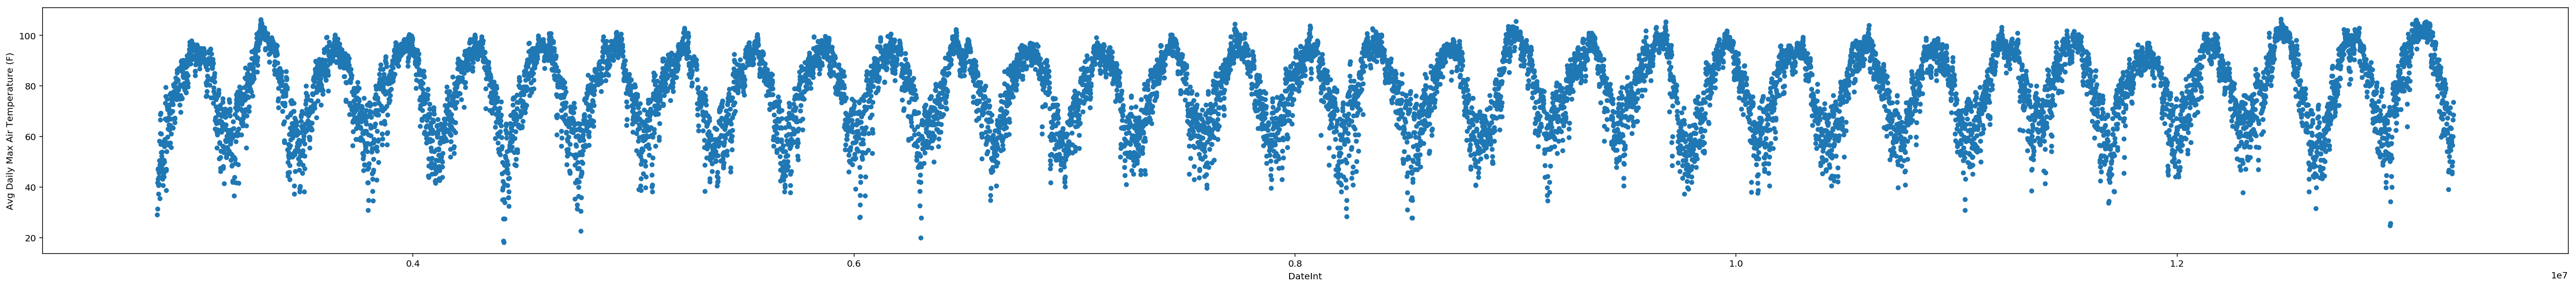

In [9]:
df.plot.scatter('DateInt', 'Avg Daily Max Air Temperature (F)', figsize=(50, 5))

In [10]:
#xaxis: displays the time: dates, months, years of data 
#yaxis: displays temp: the max avg daily air temp

>5) Describe your plot.

### Adding colors for our graph

In [11]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

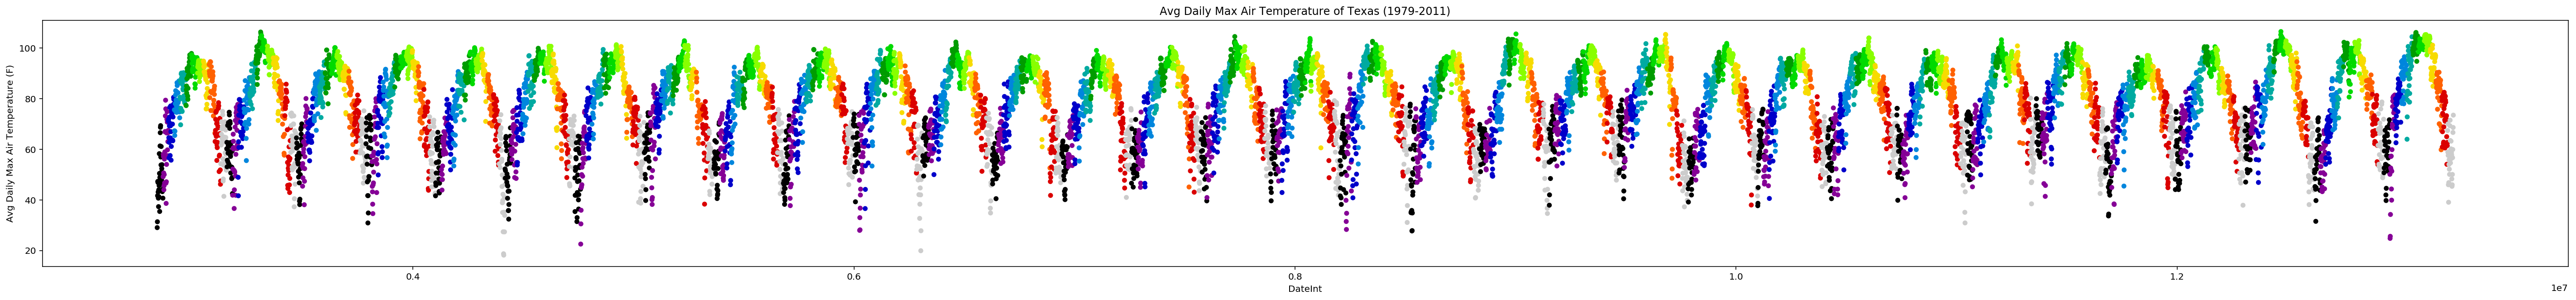

In [12]:
plot_DF=df.plot.scatter(x='DateInt',y='Avg Daily Max Air Temperature (F)', c=df['color'],figsize=(50,5))
plot_DF.set_title("Avg Daily Max Air Temperature of Texas (1979-2011)")
plt.show()

## Pick a subset of the data

In [13]:
df['Month']=df['Month'].apply(lambda x: int(x))
df['Year']=df['Year'].apply(lambda x: int(x))

df_2000 = df.loc[df['Year']==2000]
df_2000_1_to_6=df_2000.loc[df['Month']<=6]

df_2000_1_to_6

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Day,Month,Year,DateInt,color
7670,"Jan 01, 2000",2000/01/01,75.12,2000-01-01,1,1,2000,9466848.0,#000000
7671,"Jan 02, 2000",2000/01/02,72.87,2000-01-02,2,1,2000,9467712.0,#000000
7672,"Jan 03, 2000",2000/01/03,61.42,2000-01-03,3,1,2000,9468576.0,#000000
7673,"Jan 04, 2000",2000/01/04,50.62,2000-01-04,4,1,2000,9469440.0,#000000
7674,"Jan 05, 2000",2000/01/05,57.84,2000-01-05,5,1,2000,9470304.0,#000000
...,...,...,...,...,...,...,...,...,...
7847,"Jun 26, 2000",2000/06/26,91.59,2000-06-26,26,6,2000,9619776.0,#009c00
7848,"Jun 27, 2000",2000/06/27,88.92,2000-06-27,27,6,2000,9620640.0,#009c00
7849,"Jun 28, 2000",2000/06/28,90.62,2000-06-28,28,6,2000,9621504.0,#009c00
7850,"Jun 29, 2000",2000/06/29,88.07,2000-06-29,29,6,2000,9622368.0,#009c00


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

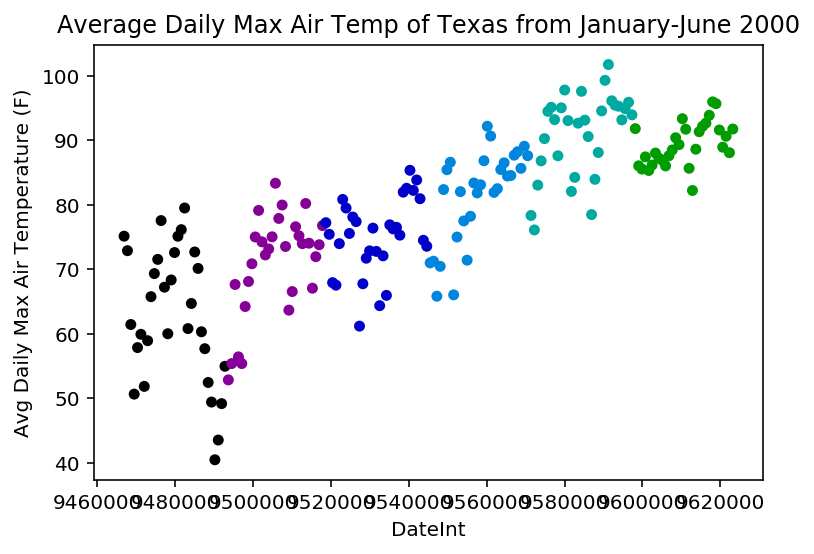

In [14]:
plot_DF2000=df_2000_1_to_6.plot.scatter(x='DateInt',y='Avg Daily Max Air Temperature (F)',c=df_2000_1_to_6['color'])
plot_DF2000.set_title("Average Daily Max Air Temp of Texas from January-June 2000")
plt.show()

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [15]:
X=df_2000_1_to_6['DateInt'].values
Y=df_2000_1_to_6['Avg Daily Max Air Temperature (F)'].values

In [16]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [17]:
Y_pred = lin_reg(X,Y)

0.0002198042956918965 -2019.6018934520785


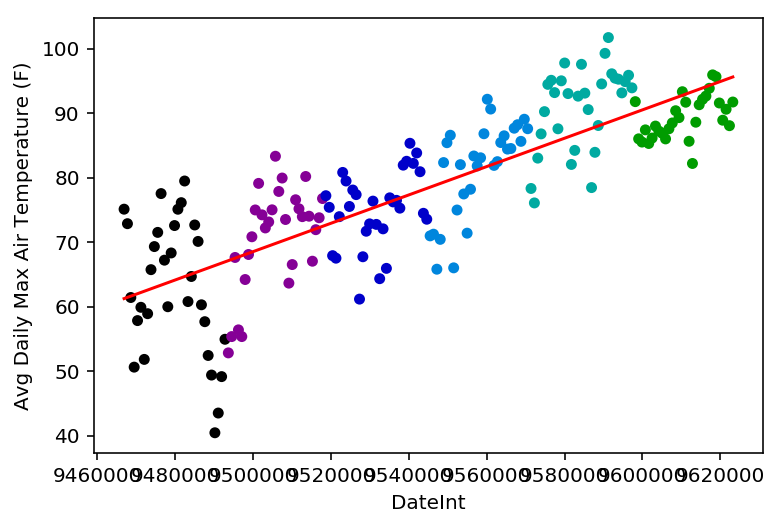

In [18]:
df_2000_1_to_6.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',c=df_2000_1_to_6['color'])
plt.plot([min(df_2000_1_to_6['DateInt'].values), max(df_2000_1_to_6['DateInt'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [19]:
#slope = 0.0002198042956918965 
#intercept = - 2019.6018934520785

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [20]:
print('Minimum Y value', min(Y_pred))
print("Maximum Y Value", max(Y_pred))

Minimum Y value 61.2519636101606
Maximum Y Value 95.62583858764219


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [21]:
x=df_2000_1_to_6['DateInt'].values
Y=df_2000_1_to_6['Avg Daily Max Air Temperature (F)'].values

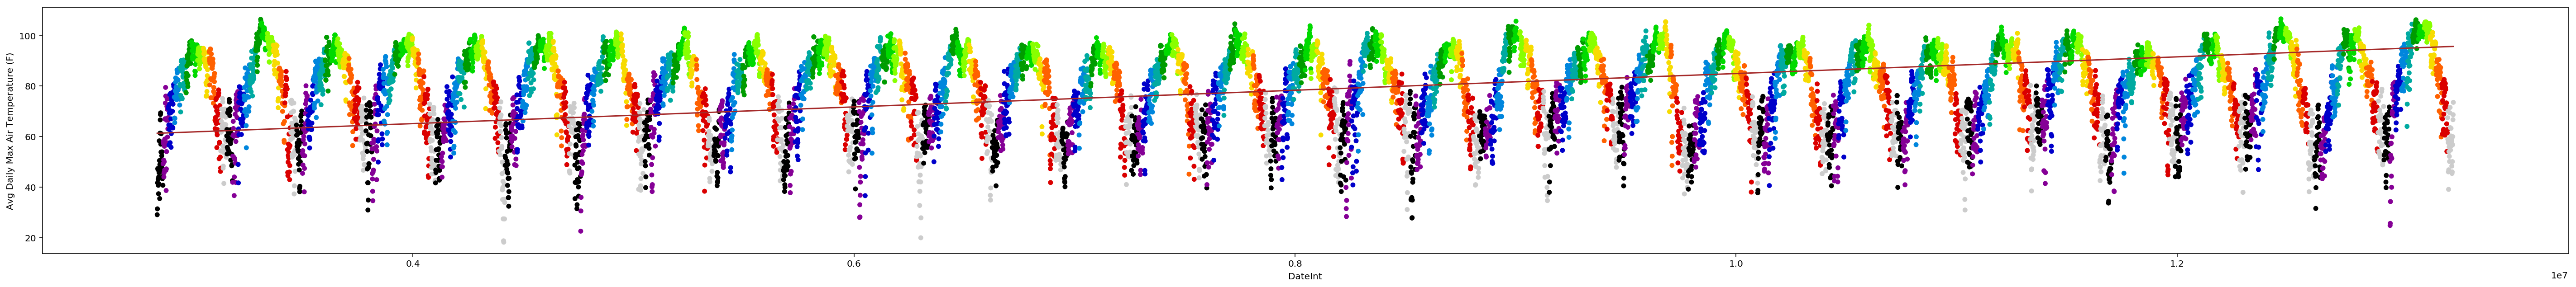

In [22]:
df.plot.scatter(x='DateInt',y='Avg Daily Max Air Temperature (F)', c=df['color'],figsize=(50,5))
plt.plot([min(df['DateInt'].values), max(df['DateInt'].values)], [min(Y_pred), max(Y_pred)], color='brown') 
plt.show()

>12) Is the slope positive or negative? What do you think that means?

In [23]:
Y_pred = lin_reg(X,Y)

0.0002198042956918965 -2019.6018934520785


In [ ]:
#my slope is positive, which means the temperature will increase in the long run